In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [2]:
data=pd.read_csv(r"C:\Users\Soumyak\Desktop\train_mnist.csv\train.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Soumyak\\Desktop\\train_mnist.csv\\train.csv'

In [3]:
#loading all the data into numpy arrays

data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
def init_params():
    W1 = np.random.randn(128, 784) * np.sqrt(2. / 784)  # He initialization for the first hidden layer
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * np.sqrt(2. / 128)   # He initialization for the second hidden layer
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1= W1.dot(X) +b1
    A1= ReLU(Z1)
    Z2= W2.dot(A1) +b2
    A2= softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y]=1
    one_hot_Y= one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y= one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/ m* dZ2.dot(A1.T)
    db2 = 1/ m* np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/ m* dZ1.dot(X.T)
    db1 = 1/ m* np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2  

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0): 
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    print("FInal Accuracy: ", get_accuracy(get_predictions(A2), Y))
    
    return W1, b1, W2, b2
        
    

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[8 8 8 ... 8 8 8] [2 6 3 ... 5 7 3]
Accuracy:  0.12421951219512195
Iteration:  10
[6 6 0 ... 3 9 3] [2 6 3 ... 5 7 3]
Accuracy:  0.6379268292682927
Iteration:  20
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.7617073170731707
Iteration:  30
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.8087317073170732
Iteration:  40
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.8316585365853658
Iteration:  50
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.8465609756097561
Iteration:  60
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.857390243902439
Iteration:  70
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.8646829268292683
Iteration:  80
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.8709268292682927
Iteration:  90
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.8755365853658537
Iteration:  100
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.8797317073170732
Iteration:  110
[2 6 0 ... 3 7 3] [2 6 3 ... 5 7 3]
Accuracy:  0.8837317073170732
Iteration:  120
[2 6 0 ... 

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [9]
Label:  9


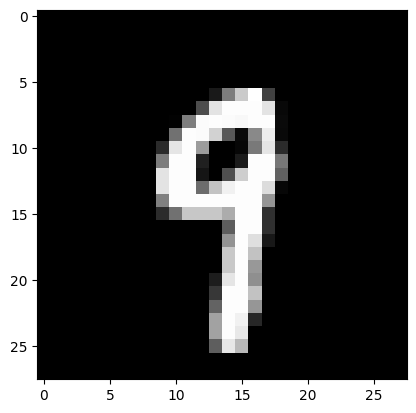

In [9]:
test_prediction(380, W1, b1, W2, b2)